Found 6000 files belonging to 8 classes.
Class Distribution:
O+: 852
AB+: 708
A-: 1009
O-: 712
AB-: 761
A+: 565
B-: 741
B+: 652

class distribution dictionary: {'O+': 852, 'AB+': 708, 'A-': 1009, 'O-': 712, 'AB-': 761, 'A+': 565, 'B-': 741, 'B+': 652}


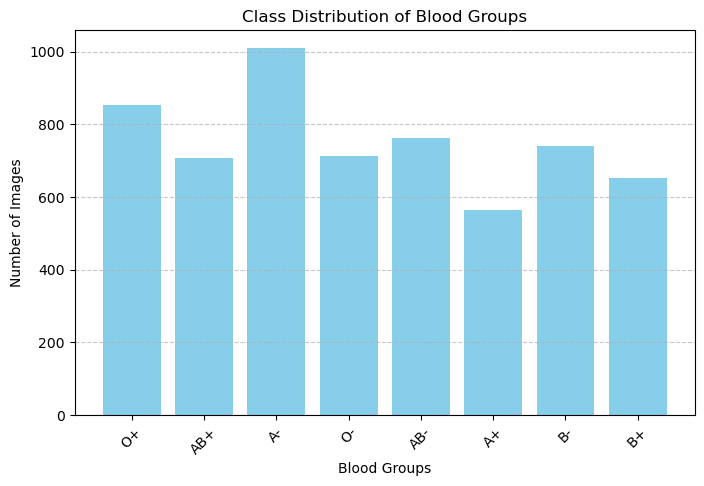

The dataset size is: 6000
Training dataset size: 5376
Validation dataset size: 288
Testing dataset size: 288
Epoch 1/50


C:\Users\Durga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    168/Unknown 23s 127ms/step - accuracy: 0.1272 - loss: 27.0603

C:\Users\Durga\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


168/168 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.1273 - loss: 26.9454 - val_accuracy: 0.1187 - val_loss: 2.0048 - learning_rate: 0.0010
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.1673 - loss: 2.0397 - val_accuracy: 0.3656 - val_loss: 1.7333 - learning_rate: 0.0010
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.3988 - loss: 1.5904 - val_accuracy: 0.5188 - val_loss: 1.3371 - learning_rate: 0.0010
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.5330 - loss: 1.2370 - val_accuracy: 0.4594 - val_loss: 1.3061 - learning_rate: 0.0010
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.6150 - loss: 1.0436 - val_accuracy: 0.7531 - val_loss: 0.8372 - learning_rate: 0.0010
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 51s 303ms/step - accuracy: 0.6843 - loss: 0.8699 - val_accuracy: 0.6125 - val_loss: 0.9970 - learning_rate: 0.0010
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 49s 290ms/step - accuracy: 0.7003 - loss

High Accuracy Model-Loss:0.2674066126346588, Accuracy: 0.831250011920929
Model saved as HDF5 format.


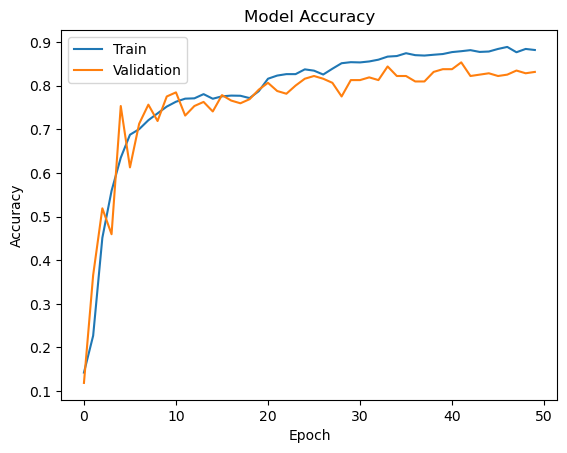

In [1]:
#importing the required llibraries and modules

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import numpy as np
import os
import shutil
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path=r"C:\Users\Durga\smart fingerprint blood analysis\dataset_blood_group"

BATCH_SIZE=32

#loading the dataset

dataset = image_dataset_from_directory(
dataset_path,
labels="inferred",
label_mode="int",
image_size=(64, 64), # Resize images to a standard size
batch_size=BATCH_SIZE,
shuffle=True)


#Check class distribution 
class_names = dataset.class_names 
class_counts = Counter()

for _,labels in dataset.unbatch():
    class_counts[int(labels.numpy())] += 1
print("Class Distribution:")

class_dict={}
for i, count in class_counts.items(): 
    print(f"{class_names[i]}: {count}")
    class_dict[class_names[i]] = count

print()
print('class distribution dictionary:',class_dict)


import matplotlib.pyplot as plt

def plot_class_distribution(class_dict):
    classes = list(class_dict.keys())   # Extract blood group names (x-axis)
    counts = list(class_dict.values())  # Extract number of images (y-axis)

    plt.figure(figsize=(8, 5))  
    plt.bar(classes, counts, color='skyblue')  
    plt.xlabel("Blood Groups")  
    plt.ylabel("Number of Images")  
    plt.title("Class Distribution of Blood Groups")  
    plt.xticks(rotation=45)  # Rotate labels for better visibility
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines
    plt.show()


plot_class_distribution(class_dict)


train_ratio = 0.9  # Example: 80% training data
val_ratio = 0.05   # Example: 10% validation data
test_ratio = 0.05  # Example: 10% test data


# Unbatch the dataset to work at the sample level 
dataset_unbatched = dataset.unbatch()

dataset_size = sum(1 for _ in dataset_unbatched)

dataset_unbatched = dataset.unbatch()

# Compute sizes based on dataset size and desired splits 
train_size = int(train_ratio* dataset_size) 
val_size = int(val_ratio* dataset_size)
# Split the dataset into training, validation, and test 
train_dataset = dataset_unbatched.take(train_size) 
val_test_dataset = dataset_unbatched.skip(train_size) 
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Rebatch the datasets after splitting
train_dataset = train_dataset.batch (BATCH_SIZE, drop_remainder =True) 
val_dataset = val_dataset.batch (BATCH_SIZE, drop_remainder =True)
test_dataset = test_dataset.batch (BATCH_SIZE, drop_remainder=True)

# Check the number of batches in each dataset 
train_batch_count=sum(1 for _ in train_dataset) 
val_batch_count = sum(1 for _ in val_dataset) 
test_batch_count = sum(1 for _ in test_dataset)

print('The dataset size is:',dataset_size)
print(f"Training dataset size: {train_batch_count* BATCH_SIZE}") 
print(f"Validation dataset size: {val_batch_count* BATCH_SIZE}") 
print(f"Testing dataset size: {test_batch_count * BATCH_SIZE}")


import tensorflow as tf

def create_high_accuracy_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

high_acc_model=create_high_accuracy_model()

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus 

reduce_lr = ReduceLROnPlateau(
monitor= 'val_loss',
factor=0.5,
patience=3,
verbose=1,
min_lr=1e-6
)

early_stop = EarlyStopping(
monitor= 'val_loss',
patience=5,
verbose=1,
restore_best_weights=True
)

# Train the model

history_high_acc = high_acc_model.fit(
train_dataset,
validation_data=val_dataset,
epochs=50,callbacks=[reduce_lr, early_stop]
)


# Evaluate the model on validation data

high_acc_eval=high_acc_model.evaluate(val_dataset)
print(f"High Accuracy Model-Loss:{high_acc_eval[0]}, Accuracy: {high_acc_eval[1]}")


high_acc_model.save('model.h5') # The model will be saved as 'my_model.h5'
print("Model saved as HDF5 format.")


# Plot training & validation accuracy values 
import matplotlib.pyplot as plt

def plot_accuracy (history): 
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to display the accuracy graph 
plot_accuracy(history_high_acc)